# Spectral Theory 

Spectral theory describes how to decouple the domain of a linear operator into 
a direct sum of minimal components upon which the operator is invariant. 
Choosing a basis that respects this direct sum results in a corresponding 
block-diagonal matrix representation. This has powerful consequences in 
applications, as it allows many problems to be reduced to a series of 
small individual parts that can be solved independently and more easily. 
The key tools for constructing this decomposition are eigenvalues and 
eigenvectors, which are widely used in many areas of science and engineering 
and have many important physical interpretations and applications.

Most finite-dimensional linear operators have eigenvectors that span the 
space (hereafter called an eigenbasis) where the corresponding matrix 
representation is diagonal. In other words, a change of basis to the 
eigenbasis shows that such a matrix operator is similar to a diagonal matrix. 
That said, not all matrices can be diagonalized, and some can only be made 
block diagonal. In the first sections of this chapter, we develop this 
theory and expound on when a matrix can be diagonalized and when we 
must settle for block diagonalization.

## Eigenvalues and Eigenvectors 


Let $L: V \to V$ be a linear operator on a finite-dimensional vector space
$V$ over $\mathbb{C}$. A scalar $\lambda \in \mathbb{C}$ is an eigenvalue of 
$L$ if there exists a nonzero $x \in V$ such that 

$$L(x)  = \lambda x $$

Any nonzero $x$ satisfying the above equation is called an eigenvector of 
$L$ corresponding to the eigenvalue $\lambda$. For each scalar $\lambda$, 
we define the $\lambda$-eigenspace of $L$ as 

$$\sum_{\lambda} (L) = \{ x \in V | L(x) = \lambda x \} $$

The set of all eigenvalues of $L$, denoted $\sigma(L)$, is called the spectrum 
of $L$. 

Let $A \in M_n(\mathbb{F})$ and $\lambda \mathbb{C}$. The following are 
equivalent:

- $\lambda$ is an eigenvalue of $A$ 
- There is a nonzero $x$ such that $(\lambda I - A)x = 0$ 
- $\lambda I - A$ is singular 
- det($\lambda I - A$) = 0

Let $A \in M_n(\mathbb{F})$. The polynomial 

$$p_A(z) = \text{det} (zI - A)$$

is called the characteristic polynomial of $A$. 

A square matrix $A$ is said to be similar to another square matrix $B$ if and 
only if there exists an invertible matrix $P$ such that 

$$B = P^{-1} A P$$

The matrix $P$ is called change-of-basis matrix. 

If $A, B \in M_n(\mathbb{F})$ are similar matrices, that is, $B = P^{-1}AP$
for some nonsingular matrix $P$, then the following hold:

- $A$ and $B$ have the same characteristic polynomials
- $A$ and $B$ have the same eigenvalues 

An operator $L$ on a finite-dimensional vector space is called

- simple if all of its eigenvalues are distinct
- semisimple if there exists an eigenbasis of $L$

The matrix $A$ is diagonalizable if it is similar to a diagonal matrix;
that is, there exists a nonsingular matrix $P$ and a diagonal matrix $D$ 
such that 

$$D = P^{-1}AP$$

A matrix is diagonalizable if and only if it is semisimple. 

## Schur's Lemma 


Schur's lemma states that any square matrix can be transformed via similarity 
to an upper-triangular matrix and that the similarity transform can be 
performed with an orthonormal matrix. At first glance, this may seem unimportant, 
but Schur's lemma is quite powerful, both theoretically and computationally.

Every matrix $A \in M_n(\mathbb{C})$ is orthonormally similar to an upper-triangular 
matrix. 

## Least Squares and Computing Eigenvalues

A linear system $Ax = b$ is overdetermined if it has more equations than
unknown. In this situation, there is no true solution, and $x$ can only
be approximated. 

The least squares solution $Ax = b$, denoted $\hat{x}$, is the "closest" 
vector to a solution, meaning it minimizes the quantity $$||A \hat{x} - b||_2$$

If $A$ is full rank (which it usually is in application) its QR decomposition provides an 
efficient way to solve the normal equations. Let $A = QR$ be the reduced QR decomposition of
$A$, so $Q$ is $m \times n$ with orthonormal columns and $R$ is an $n \times n$ 
invertible, and upper triangular. Therefore, we could have

\begin{aligned}
A^T A \hat{x}  & = A^T b \\ 
(QR)^T(QR)\hat{x} &  = (QR)^T b \\
R^TR \hat{x} & = R^T Q^T b \\ 
R \hat{x} & = Q^T b
\end{aligned}

Thus $\hat{x}$ is the least squares solution to $Ax = b$ if and only if
$R\hat{x}= Q^Tb$. 

In [17]:
import time
import numpy as np
import jax.numpy as jnp
import jax.scipy as jsp
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
from jax import random
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
%config InlineBackend.figure_formats = ['svg']
%env XLA_PYTHON_CLIENT_MEM_FRACTION=0.3

env: XLA_PYTHON_CLIENT_MEM_FRACTION=0.3


In [4]:
# load the dataset 
url = "https://hastie.su.domains/ElemStatLearn/datasets/prostate.data"
data = pd.read_csv(url, delimiter="\t").iloc[:, 1:]
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [5]:
X = data[data.columns[:-2]]  # 
X.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0


In [6]:
y = data['lpsa']
y.head()

0   -0.430783
1   -0.162519
2   -0.162519
3   -0.162519
4    0.371564
Name: lpsa, dtype: float64

In [10]:
Q, R = jnp.linalg.qr(X.values)

In [19]:
# solve triangular 
coef = jsp.linalg.solve_triangular(R, Q.T@y)

In [22]:
coef

DeviceArray([ 0.5616064 ,  0.6363374 , -0.02075108,  0.09389459,
              0.76359177, -0.10662314,  0.06518073,  0.00417305],            dtype=float32)

In [36]:
def fit_least_squares(A, b):
    Q, R = jnp.linalg.qr(A)
    coef = jsp.linalg.solve_triangular(R, Q.T @ b)
    
    return coef

In [23]:
data = np.load("../data/housing.npy")

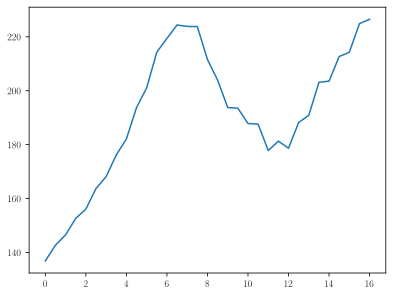

In [24]:
plt.plot(data[:, 0], data[:,1]);

In [35]:
# construct matrix X and y
x1 = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
const = jnp.ones_like(x1)

In [37]:
X = jnp.hstack([const, x1])

In [39]:
coef = fit_least_squares(X, y)

In [43]:
coef

DeviceArray([[164.08096  ],
             [  3.3747654]], dtype=float32)

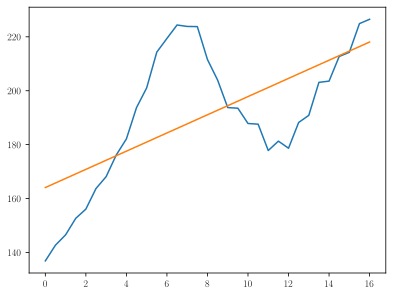

In [45]:
plt.plot(data[:, 0], data[:,1])
plt.plot(x1, X @ coef);

## Fitting a Polynomial


In [47]:
jnp.vander(jnp.array([2, 3, 5]), 2)

DeviceArray([[2, 1],
             [3, 1],
             [5, 1]], dtype=int32)

In [48]:
jnp.vander(jnp.array([2, 3, 5]), 3)

DeviceArray([[ 4,  2,  1],
             [ 9,  3,  1],
             [25,  5,  1]], dtype=int32)

In [49]:
np.poly1d([1, -3, 2])

poly1d([ 1, -3,  2])

In [60]:
def poly_fit(A, b, degree=2):
    """
    Polynomial fit with different degrees for housing dataset 
    """
    a = jnp.vander(A.flatten(), degree)
    coef = jnp.linalg.lstsq(a, b)[0]
    
    return coef

In [79]:
coef3 = poly_fit(x1, y, 3)
coef6 = poly_fit(x1, y, 6)
coef9 = poly_fit(x1, y, 9)
coef12 = poly_fit(x1, y, 12)

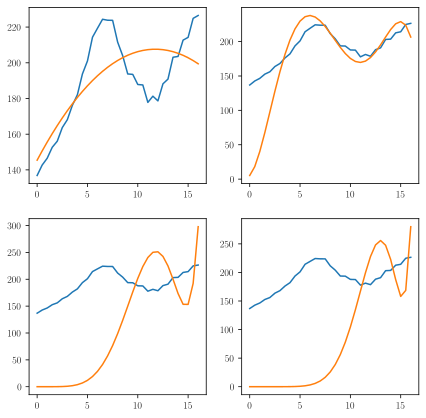

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes[0, 0].plot(data[:, 0], data[:,1])
axes[0, 0].plot(data[:, 0], jnp.vander(x1.flatten(), 3) @ coef3)
axes[0, 1].plot(data[:, 0], data[:,1])
axes[0, 1].plot(data[:, 0], jnp.vander(x1.flatten(), 6) @ coef6)
axes[1, 0].plot(data[:, 0], data[:,1])
axes[1, 0].plot(data[:, 0], jnp.vander(x1.flatten(), 9) @ coef9)
axes[1, 1].plot(data[:, 0], data[:,1])
axes[1, 1].plot(data[:, 0], jnp.vander(x1.flatten(), 12) @ coef12);

In [84]:
jnp.polyfit(x1.flatten(), y, 2)

DeviceArray([[ -0.45098796],
             [ 10.590573  ],
             [145.44012   ]], dtype=float32)

In [83]:
coef3

DeviceArray([[ -0.45098722],
             [ 10.590576  ],
             [145.4401    ]], dtype=float32)

Having more parameters in a least squares model is not always better. 
For a set of m points, the best fit polynomial of degree m − 1 interpolates 
the data set, meaning that $p(x_k) = y_k$ exactly for each k. In this case 
there are enough unknowns that the system is no longer overdetermined. 
However, such polynomials are highly subject to numerical errors and are 
unlikely to accurately represent true patterns in the data.

Choosing to have too many unknowns in a fitting problem is (fittingly) 
called overfitting, and is an important issue to avoid in any statistical model.

## Fitting a Circle

The general equation of a circle with radius $r$ and center $(c_1, c_2)$ is

$$(x-c_1)^2 + (y-c_2)^2 = r^2$$

The circle is uniquely determined by $r, c_1$ and $c_2$, so these are the 
parameters that should be solved for in a least squares formulation of the 
problem. 

We can expand the above equation as

$$x^2 + y^2 = 2c_1 x + 2c_2y + r^2 -c_1^2 -c_2^2$$

Now, define a new variable $c_3 = r^2 -c_1^2 -c_2^2$, we could have a
linear equation

$$2c_1 x_k + 2c_2 y_k + c_3 = x_k^2 + y_k^2$$